In [2]:
# Core ID and DSP
# Audio Loading

In [3]:
# librosa.load
# Load an ogg vorbis file
import librosa
filename = librosa.ex('trumpet')

In [4]:
y, sr = librosa.load(filename)

In [5]:
y

array([-1.4068224e-03, -4.4607223e-04, -4.1098078e-04, ...,
        7.9623060e-06, -3.0417003e-05,  1.2765067e-05], dtype=float32)

In [6]:
sr

22050

In [7]:
import IPython
IPython.display.Audio(data=y, rate=sr)

In [8]:
# Load a file and resample to 11 kHz
y, sr = librosa.load(filename, sr=11025)
y

array([-8.7455829e-04, -3.3625262e-04,  1.4627795e-04, ...,
        1.2944983e-05, -1.3008446e-05,  0.0000000e+00], dtype=float32)

In [9]:
sr

11025

In [10]:
# Load 5 seconds of a file, starting 15 seconds in
filename = librosa.ex('brahms')
y, sr = librosa.load(filename, offset=15.0, duration=5.0)

In [11]:
y

array([0.14572227, 0.14410423, 0.1298924 , ..., 0.20087598, 0.12822492,
       0.01499038], dtype=float32)

In [12]:
sr

22050

In [13]:
IPython.display.Audio(data=y, rate=sr)

In [14]:
# librosa.stream
# 一度に256フレームのブロックに短時間フーリエ変換を適用する。ストリーミング操作には左揃えのフレームが必要なため(center=False),
# パディングアーティファクトを回避するように設定する必要があることに注意
filename = librosa.ex('brahms')
sr = librosa.get_samplerate(filename)
stream = librosa.stream(filename, block_length=256, frame_length=4096, hop_length=1024)
for y_block in stream:
    D_block = librosa.stft(y_block, center=False)
D_block

array([[-2.22313017e-01+0.00000000e+00j, -2.25546490e-02+0.00000000e+00j,
         4.42391694e-01+0.00000000e+00j, ...,
         1.17659784e-08+0.00000000e+00j,  1.41798484e-08+0.00000000e+00j,
         1.62302261e-08+0.00000000e+00j],
       [ 3.59330028e-01-1.61170572e-01j,  7.82860965e-02+3.83234262e-01j,
        -5.12235105e-01+8.28746557e-02j, ...,
        -9.27060917e-09+9.34359923e-10j, -2.81905305e-10-6.81673440e-10j,
        -1.43087435e-08+4.79163065e-09j],
       [-2.95028210e-01+1.17990613e-01j, -5.20781241e-02-1.16777949e-01j,
         3.75418097e-01-2.28902921e-01j, ...,
         3.80477783e-09-3.47353235e-09j, -5.21666221e-09+5.93252913e-09j,
         8.98822705e-09-9.47633350e-09j],
       ...,
       [ 1.25979204e-06-5.27676150e-07j, -7.40986434e-06+4.31851186e-06j,
         3.90108471e-06+6.74667717e-06j, ...,
         7.20701282e-05-1.21505975e-04j,  3.96551077e-05+4.90455823e-05j,
        -3.34207652e-06-2.04240268e-06j],
       [ 1.19822937e-06+7.31604359e-08j, -8.

In [15]:
# または、短いフレームと重複しないウインドウを使用して、ストリーム上のメルスペクトログラムを計算する
filename = librosa.ex('brahms')
sr = librosa.get_samplerate(filename)
stream = librosa.stream(filename, block_length=256, frame_length=2048, hop_length=2048)
for y_block in stream:
    m_block = librosa.feature.melspectrogram(y_block, sr=sr, n_fft=2048, hop_length=2048, center=False)
m_block

array([[6.3820146e-03, 1.3656819e-01, 9.1885164e-02, ..., 6.7328644e-17,
        1.0955597e-17, 6.7114738e-18],
       [1.5471001e-02, 9.9323816e+00, 3.6122708e+00, ..., 6.1904893e-17,
        1.0484248e-17, 8.4559473e-18],
       [6.2763475e-02, 5.0029144e+00, 2.0923162e+00, ..., 7.4053655e-17,
        1.1693036e-17, 8.9855828e-18],
       ...,
       [5.9395494e-05, 2.5858803e-06, 9.3304334e-05, ..., 2.0132760e-09,
        1.5194061e-08, 1.5923019e-08],
       [1.4560865e-04, 2.3088083e-04, 1.2688844e-04, ..., 9.5143591e-09,
        1.7857790e-08, 1.3517166e-08],
       [5.1432504e-05, 8.8567205e-05, 1.0378375e-05, ..., 2.5251502e-08,
        1.2882091e-08, 5.4757927e-09]], dtype=float32)

In [16]:
# librosa.to_mono
# →チャネル間でサンプルを平均化することにより、オーディオ信号をモノラルに変換する
y, sr = librosa.load(librosa.ex('trumpet', hq=True), mono=False)

In [17]:
y.shape

(2, 117601)

In [18]:
y_mono=librosa.to_mono(y)

In [19]:
y_mono.shape

(117601,)

In [20]:
# librosa.resample
# →orig_srから、target_srへの時系列をサンプリングする
# デフォルトでは、これは帯域制限されたsinc補間に高品質メソッドを使用する
# 22kHzから8kHzにダウンサンプル
y, sr = librosa.load(librosa.ex('trumpet'), sr=22050)
y_8k = librosa.resample(y, sr, 8000)
y.shape, y_8k.shape

((117601,), (42668,))

In [21]:
# librosa.get_duration
# →Compute the duration (in seconds) of an audio time series, feature matrix, or filename.
# →オーディオ時系列、機能マトリックス、またはファイルの長さを計算する
# Load an exmaple audio file
y, sr = librosa.load(librosa.ex('trumpet'))
librosa.get_duration(y=y, sr=sr)

5.333378684807256

In [22]:
# Or directly from an audio file
librosa.get_duration(filename=librosa.ex('trumpet'))

5.333378684807256

In [23]:
# Or compute duration from an STFT matrix
y, sr = librosa.load(librosa.ex('trumpet'))
S = librosa.stft(y)
librosa.get_duration(S=S, sr=sr)

5.317369614512471

In [24]:
# Or a nan-centered STFT matrix
S_left = librosa.stft(y, center=False)
librosa.get_duration(S=S_left, sr=sr)

5.224489795918367

In [25]:
# librosa.get_samplerate
# →Get the sampling rate for a given file.
# →特定のファイルのサンプルレートを取得する
path = librosa.ex('trumpet')
librosa.get_samplerate(path)

22050

In [26]:
# Time-domain processing
# librosa.autocorrelate
# →Bounded-lag auto-correlation
# yの完全な自己相関を計算する
y, sr = librosa.load(librosa.ex('trumpet'))
librosa.autocorrelate(y)

array([ 6.8993134e+02,  6.2359753e+02,  4.4878745e+02, ...,
        2.4014453e-06, -1.7270065e-06,  5.7033212e-06], dtype=float32)

In [27]:
# 最大4秒の開始強度の自己相関の計算する
import matplotlib.pyplot as plt
odf = librosa.onset.onset_strength(y=y, sr=sr, hop_length=512)
ac = librosa.autocorrelate(odf, max_size=4*sr / 512)
fig, ax = plt.subplots()
ax.plot(ac)
ax.set(title='Auto-correlation', xlabel='Lag(frames)')

[Text(0.5, 0, 'Lag(frames)'), Text(0.5, 1.0, 'Auto-correlation')]

In [28]:
# librosa.lpc
# →Linear Prediction Coefficients via Burg’s method
# Compute LP coefficients of y at order 16 on entire series
y, sr = librosa.load(librosa.ex('trumpet'))
librosa.lpc(y, 16)

array([ 1.        , -3.3476567 ,  5.574667  , -6.394569  ,  6.2516727 ,
       -5.760988  ,  5.039021  , -4.243651  ,  3.65261   , -3.1746979 ,
        2.7009706 , -2.179053  ,  1.6724658 , -1.2253675 ,  0.8327962 ,
       -0.43082687,  0.12154016], dtype=float32)

Text(0.5, 1.0, 'LP Model Forward Prediction')

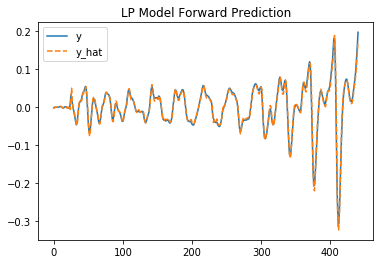

In [29]:
# Compute LP coefficients, and plot LP estimate of original series
import matplotlib.pyplot as plt
import numpy as np
import scipy
y, sr = librosa.load(librosa.ex('trumpet'), duration=0.020)
a = librosa.lpc(y, 2)
b = np.hstack([[0], -1 * a[1:]])
y_hat = scipy.signal.lfilter(b, [1], y)
fig, ax = plt.subplots()
ax.plot(y)
ax.plot(y_hat, linestyle='--')
ax.legend(['y', 'y_hat'])
ax.set_title('LP Model Forward Prediction')

In [30]:
# librosa.zero_crossings
# →Find the zero-crossings of a signal y: indices i such that sign(y[i]) != sign(y[j]).
# Generate a time-series
y = np.sin(np.linspace(0, 4 * 2 * np.pi, 20))
y

array([ 0.00000000e+00,  9.69400266e-01,  4.75947393e-01, -7.35723911e-01,
       -8.37166478e-01,  3.24699469e-01,  9.96584493e-01,  1.64594590e-01,
       -9.15773327e-01, -6.14212713e-01,  6.14212713e-01,  9.15773327e-01,
       -1.64594590e-01, -9.96584493e-01, -3.24699469e-01,  8.37166478e-01,
        7.35723911e-01, -4.75947393e-01, -9.69400266e-01, -9.79717439e-16])

In [32]:
# Compute zero-crossing
z = librosa.zero_crossings(y)
z

array([ True, False, False,  True, False,  True, False, False,  True,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True])

In [33]:
# Stack y aginst the zero-crossing indicator
librosa.util.stack([y, z], axis=-1)

array([[ 0.00000000e+00,  1.00000000e+00],
       [ 9.69400266e-01,  0.00000000e+00],
       [ 4.75947393e-01,  0.00000000e+00],
       [-7.35723911e-01,  1.00000000e+00],
       [-8.37166478e-01,  0.00000000e+00],
       [ 3.24699469e-01,  1.00000000e+00],
       [ 9.96584493e-01,  0.00000000e+00],
       [ 1.64594590e-01,  0.00000000e+00],
       [-9.15773327e-01,  1.00000000e+00],
       [-6.14212713e-01,  0.00000000e+00],
       [ 6.14212713e-01,  1.00000000e+00],
       [ 9.15773327e-01,  0.00000000e+00],
       [-1.64594590e-01,  1.00000000e+00],
       [-9.96584493e-01,  0.00000000e+00],
       [-3.24699469e-01,  0.00000000e+00],
       [ 8.37166478e-01,  1.00000000e+00],
       [ 7.35723911e-01,  0.00000000e+00],
       [-4.75947393e-01,  1.00000000e+00],
       [-9.69400266e-01,  0.00000000e+00],
       [-9.79717439e-16,  1.00000000e+00]])

In [34]:
# Find the indices of zero-crossings
np.nonzero(z)

(array([ 0,  3,  5,  8, 10, 12, 15, 17, 19], dtype=int64),)

In [36]:
# librosa.mu_compress
# →mu-law compression
# 入力信号が与えられると、mu-law圧縮は次のように計算される
# sign(x) * ln(1 + mu * abs(x)) / ln(1 + mu)
# Compression without quantization(量子化なしの圧縮)
x = np.linspace(-1, 1, num=16)
x

array([-1.        , -0.86666667, -0.73333333, -0.6       , -0.46666667,
       -0.33333333, -0.2       , -0.06666667,  0.06666667,  0.2       ,
        0.33333333,  0.46666667,  0.6       ,  0.73333333,  0.86666667,
        1.        ])

In [37]:
y = librosa.mu_compress(x, quantize=False)
y

array([-1.        , -0.97430198, -0.94432361, -0.90834832, -0.86336132,
       -0.80328309, -0.71255496, -0.52124063,  0.52124063,  0.71255496,
        0.80328309,  0.86336132,  0.90834832,  0.94432361,  0.97430198,
        1.        ])

In [39]:
# Compress with quantization(量子化ありの圧縮)
y = librosa.mu_compress(x, quantize=True)
y

array([-128, -124, -120, -116, -110, -102,  -91,  -66,   66,   91,  102,
        110,  116,  120,  124,  127], dtype=int64)

In [41]:
# Compress with quantization and a small range
y = librosa.mu_compress(x, mu=15, quantize=True)
y

array([-8, -7, -7, -6, -6, -5, -4, -2,  2,  4,  5,  6,  6,  7,  7,  7],
      dtype=int64)

In [42]:
# librosa.mu_expand
# →mu-law expansion
# この関数はmu_compressの逆関数。mu-law圧縮信号が与えられると、mu-law展開は次のように計算される
# sign(x) * (1 / mu) * ((1 + mu)**abs(x) -1)
# Compress and expand without quantization(量子化せずに圧縮及び拡張)
x = np.linspace(-1, 1, num=16)
x

array([-1.        , -0.86666667, -0.73333333, -0.6       , -0.46666667,
       -0.33333333, -0.2       , -0.06666667,  0.06666667,  0.2       ,
        0.33333333,  0.46666667,  0.6       ,  0.73333333,  0.86666667,
        1.        ])

In [44]:
y = librosa.mu_compress(x, quantize=False)
y

array([-1.        , -0.97430198, -0.94432361, -0.90834832, -0.86336132,
       -0.80328309, -0.71255496, -0.52124063,  0.52124063,  0.71255496,
        0.80328309,  0.86336132,  0.90834832,  0.94432361,  0.97430198,
        1.        ])

In [46]:
z = librosa.mu_expand(y, quantize=False)
z

array([-1.        , -0.86666667, -0.73333333, -0.6       , -0.46666667,
       -0.33333333, -0.2       , -0.06666667,  0.06666667,  0.2       ,
        0.33333333,  0.46666667,  0.6       ,  0.73333333,  0.86666667,
        1.        ])

In [47]:
# Compress and expand with quantization. Note that this necessarily incurs quantization error, particularly for values near +-1.
# 量子化で圧縮及び拡張する。これは、特に+１に近い値の場合、必然的に量子化エラーが発生することに注意
y = librosa.mu_compress(x, quantize=True)
y

array([-128, -124, -120, -116, -110, -102,  -91,  -66,   66,   91,  102,
        110,  116,  120,  124,  127], dtype=int64)

In [49]:
z = librosa.mu_expand(y, quantize=True)
z

array([-1.        , -0.84027248, -0.70595818, -0.59301377, -0.4563785 ,
       -0.32155973, -0.19817918, -0.06450245,  0.06450245,  0.19817918,
        0.32155973,  0.4563785 ,  0.59301377,  0.70595818,  0.84027248,
        0.95743702])

In [50]:
# Signal generation
# librosa.clicks
# →Construct a “click track”.This returns a signal with the signal click sound placed at each specified time.
# →「click track」を作成する。これにより指定された時間毎に、click信号音が鳴った信号が返される
# Sonify detected beat events
y, sr = librosa.load(librosa.ex('choice'), duration=10)
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
y_beats = librosa.clicks(frames=beats, sr=sr)

In [51]:
# Or generate a signal of the same length as y
y_beats = librosa.clicks(frames=beats, sr=sr, length=len(y))

In [53]:
# Or use timing instead of frame indices
times = librosa.frames_to_time(beats, sr=sr)
y_beat_times = librosa.clicks(times=times, sr=sr)

In [54]:
# Or with a click frequency of 880Hz and a 500ms sample
y_beat_times880 = librosa.clicks(times=times, sr=sr, click_freq=880, click_duration=0.5)

Text(0.5, 1, '')

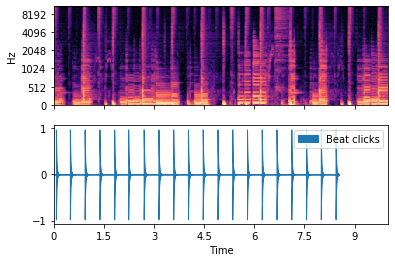

In [61]:
# Display click waveform next to the spectrogram
# スペクトログラムの横にクリック波形を表示する
import librosa.display
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
S = librosa.feature.melspectrogram(y=y, sr=sr)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', ax=ax[0])
librosa.display.waveshow(y_beat_times, sr=sr, label='Beat clicks', ax=ax[1])
ax[1].legend()
ax[0].label_outer()
ax[0].set_title(None)

In [62]:
# librosa.tone
# →Construct a pure tone (cosine) signal at a given frequency.
# →特定の周波数で純音(コサイン)信号を作成する

In [63]:
# Generate a pure sine tone A4
# 純粋な正弦波を生成するA4
tone = librosa.tone(440, duration=1)

In [64]:
# Or generate the same signal using length
# または長さを使用して、同じ信号を生成する
tone = librosa.tone(440, sr=22050, length=22050)

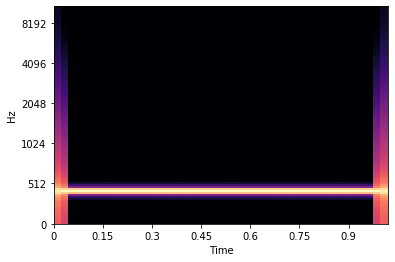

In [67]:
# Display spectrogram
# スペクトログラムを表示する
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S = librosa.feature.melspectrogram(y=tone)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', ax=ax)

In [68]:
# librosa.chirp
# →Construct a “chirp” or “sine-sweep” signal.
# →「チャープ」または「サインスイープ」信号を作成する
# →The chirp sweeps from frequency fmin to fmax (in Hz).
# →チャープは周波数fminからfmax(Hz単位)までスイープする

In [69]:
# Generate a exponential chirp from A2 to A8
# A2からA8への指数チャープを生成する
exponential_chirp = librosa.chirp(110, 110*64, duration=1)

In [70]:
# Or generate the same signal using length
# または、lengthを使用して同じ信号を生成する
exponential_chirp = librosa.chirp(110, 110*64, sr=22050, length=22050)

In [71]:
# Or generate a linear chirp instead
# または、代わりに線形チャープを生成する
linear_chirp = librosa.chirp(110, 110*64, duration=1, linear=True)

[Text(0.5, 1.0, 'Linear chirp')]

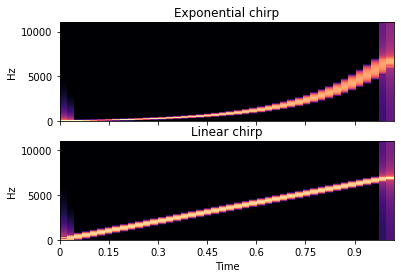

In [72]:
# Display spectrogram for both exponential and linear chirps.
# 指数チャープと線形チャープの両方のスペクトログラムを表示する
import matplotlib.pyplot as plt
import librosa.display
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
S_exponential = np.abs(librosa.stft(y=exponential_chirp))
librosa.display.specshow(librosa.amplitude_to_db(S_exponential, ref=np.max),
                         x_axis='time', y_axis='linear', ax=ax[0])
ax[0].set(title='Exponential chirp', xlabel=None)
ax[0].label_outer()
S_linear = np.abs(librosa.stft(y=linear_chirp))
librosa.display.specshow(librosa.amplitude_to_db(S_linear, ref=np.max),
                         x_axis='time', y_axis='linear', ax=ax[1])
ax[1].set(title='Linear chirp')

In [1]:
# Spectral representations
# librosa.stft
# →Short-time Fourier transform (STFT).
# →The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows.
# →短時間フーリエ変換(STFT)
# →STFTは、短いオーバーラップウインドウで離散フーリエ変換(DFT)を計算することにより、時間周波数領域で信号を表す

In [4]:
import librosa
import numpy as np
y, sr = librosa.load(librosa.ex('trumpet'))
S = np.abs(librosa.stft(y))
S

array([[5.3953640e-03, 3.3315693e-03, 1.0328183e-03, ..., 2.2926326e-08,
        9.8623946e-07, 1.2011992e-05],
       [3.2442170e-03, 2.6903967e-03, 1.0622127e-03, ..., 2.4819453e-08,
        9.5359269e-07, 1.2008374e-05],
       [2.3986856e-03, 7.7155454e-04, 1.5704575e-03, ..., 2.5813943e-08,
        9.6956455e-07, 1.1990609e-05],
       ...,
       [7.4183219e-05, 3.6273319e-05, 1.2351239e-06, ..., 3.3514752e-04,
        7.0897001e-04, 8.2297879e-04],
       [7.5229633e-05, 3.7224112e-05, 1.3674936e-06, ..., 2.4655956e-04,
        1.1880830e-04, 1.0312897e-03],
       [7.6400574e-05, 3.9438059e-05, 1.9221090e-06, ..., 1.9005347e-04,
        5.1795773e-04, 1.3460773e-03]], dtype=float32)

In [6]:
# Use left-aligned frames, instead of centered frames
# 中央揃えのフレームではなく、左揃えのフレームを使用する
S_stft = librosa.stft(y, center=False)

In [7]:
# Use a shorter hop length
# より短いホップ長を使用する
D_short = librosa.stft(y, hop_length=64)

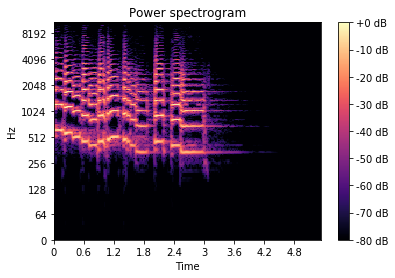

In [9]:
# Display a spectrogram
# スペクトログラムを表示する
import matplotlib.pyplot as plt
import librosa.display
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [10]:
# librosa.istft
# →Inverse short-time Fourier transform (ISTFT).
# →Converts a complex-valued spectrogram stft_matrix to time-series y by minimizing the mean squared error 
#    between stft_matrix and STFT of y as described in 1 up to Section 2 (reconstruction from MSTFT).
# →逆短時間フーリエ変換(ISTFT)
# →セクション２(MSTFTからの再構築)で説明したように、stft_matrixとSTFTの間の平均二乗誤差を最小化することにより、
#     複素数値スペクトログラムを時系列に変換する

In [11]:
y, sr = librosa.load(librosa.ex('trumpet'))
D = librosa.stft(y)
y_hat = librosa.istft(D)
y_hat

array([-1.4068276e-03, -4.4606836e-04, -4.1097868e-04, ...,
       -2.5985444e-05,  5.1308193e-06, -1.4172890e-05], dtype=float32)

In [14]:
# Exactly preserving length of the input signal requires explicit padding. Otherwise, a partial frame at the end of y will not be represented.
# 入力信号の長さを正確に保持するためには、明示的なパディングが必要。それ以外の場合、最後の部分的なフレームは表示されない
n = len(y)
n_fft = 2048
y_pad = librosa.util.fix_length(y, n + n_fft // 2)
D = librosa.stft(y_pad, n_fft=n_fft)
y_out = librosa.istft(D, length=n)
np.max(np.abs(y - y_out))

1.1920929e-07

In [1]:
# librosa.reassigned_spectrogram
# →Time-frequency reassigned spectrogram.
# →時間周波数再割り当てスペクトログラム

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
amin = 1e-10
n_fft = 64
sr = 4000
y = 1e-3 * librosa.clicks(times=[0.3], sr=sr, click_duration=1.0,
                          click_freq=1200.0, length=8000) +\
    1e-3 * librosa.clicks(times=[1.5], sr=sr, click_duration=0.5,
                          click_freq=400.0, length=8000) +\
    1e-3 * librosa.chirp(200, 1600, sr=sr, duration=2.0) +\
    1e-6 * np.random.randn(2*sr)
freqs, times, mags = librosa.reassigned_spectrogram(y=y, sr=sr, n_fft=n_fft)
mags_db = librosa.power_to_db(mags, ref=np.max)

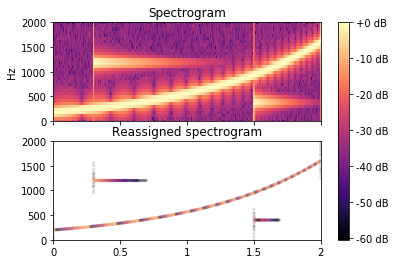

In [10]:
import librosa.display
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
img = librosa.display.specshow(mags_db, x_axis="s", y_axis="linear", sr=sr, hop_length=n_fft//4, ax=ax[0])
ax[0].set(title="Spectrogram", xlabel=None)
ax[0].label_outer()
ax[1].scatter(times, freqs, c=mags_db, cmap="magma", alpha=0.1, s=5)
ax[1].set_title("Reassigned spectrogram")
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [11]:
# librosa.cqt
# →Compute the constant-Q transform of an audio signal.
# →オーディオ信号の定数Q変換を計算する

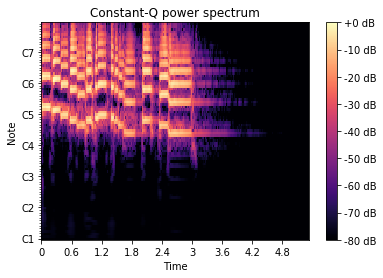

In [3]:
# Generate and plot a constant-Q power spectrum
# 定数Qのパワースペクトラムを生成してプロットする
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
y, sr = librosa.load(librosa.ex('trumpet'))
C = np.abs(librosa.cqt(y, sr=sr))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [5]:
# Limit the frequency range
# 周波数範囲を制限する
C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C2'), n_bins=60))
C

array([[6.8297924e-04, 6.3605729e-04, 5.1445956e-04, ..., 4.7663349e-09,
        7.3618205e-09, 9.1018304e-09],
       [5.3657941e-04, 4.8184479e-04, 3.4144818e-04, ..., 6.2051351e-09,
        8.9527079e-09, 1.0673776e-08],
       [5.0225563e-04, 4.4293766e-04, 3.0520701e-04, ..., 4.6189097e-09,
        7.9744567e-09, 1.0392808e-08],
       ...,
       [1.5283624e-03, 3.4248614e-01, 4.8705620e-01, ..., 2.7864045e-05,
        2.8400789e-05, 1.2622295e-05],
       [4.2882312e-02, 4.5797607e-01, 7.8990430e-01, ..., 8.6042619e-06,
        1.5286541e-05, 5.5721771e-06],
       [2.9652405e-03, 1.5075846e-01, 3.7219161e-01, ..., 2.8175182e-06,
        8.9645928e-06, 1.4554862e-05]], dtype=float32)

In [6]:
# Using a higher frequency resolution
# より高い周波数分解能を使用する
C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C2'), n_bins=60 * 2, bins_per_octave=12 * 2))
C

array([[5.4675894e-04, 5.3819758e-04, 5.1396608e-04, ..., 5.5630611e-09,
        5.9111032e-09, 6.1053242e-09],
       [4.1181597e-04, 4.0139913e-04, 3.7271567e-04, ..., 7.1318227e-09,
        7.7877020e-09, 8.1597644e-09],
       [3.1933503e-04, 3.1136716e-04, 2.8910191e-04, ..., 7.2815682e-09,
        8.0090556e-09, 8.4300433e-09],
       ...,
       [5.8272269e-02, 2.4601454e-01, 4.9481511e-01, ..., 1.2110529e-05,
        2.3816023e-05, 1.8449797e-05],
       [2.7799935e-03, 1.4241077e-01, 1.0177829e-01, ..., 1.2498464e-05,
        4.2248589e-06, 2.3883633e-05],
       [5.1468488e-02, 6.9585487e-02, 2.8860388e-02, ..., 7.8559569e-06,
        1.6940194e-05, 5.8111523e-06]], dtype=float32)

In [7]:
# librosa.icqt
# →Compute the inverse constant-Q transform.
# →Given a constant-Q transform representation C of an audio signal y, this function produces an approximation y_hat.
# →逆定数Q変換を計算する
# →オーディオ信号の定数Q変換表現が与えられると、この関数は近似を生成する

In [9]:
# Using default parameters
# デフォルトパラメータの使用
y, sr = librosa.load(librosa.ex('trumpet'))
C = librosa.cqt(y=y, sr=sr)
y_hat = librosa.icqt(C=C, sr=sr)

C:\Users\ryu\Anaconda3\lib\site-packages\librosa\core\constantq.py:674: UserWarning: hop_length=512 exceeds minimum CQT filter length=93.853.
This will probably cause unpleasant acoustic artifacts. Consider decreasing your hop length or increasing the frequency resolution of your CQT.
  "frequency resolution of your CQT.".format(hop_length, min(lengths))


In [11]:
# Or with a different hop length and frequency resolution:
# または、ホップ長と周波数分解能が異なる場合：
hop_length = 256
bins_per_octave = 12* 3
C = librosa.cqt(y=y, sr=sr, hop_length=256, n_bins=7*bins_per_octave,
                bins_per_octave=bins_per_octave)
y_hat = librosa.icqt(C=C, sr=sr, hop_length=hop_length,
                bins_per_octave=bins_per_octave)
C, y_hat

(array([[-1.4104334e-05+3.9781239e-07j,  7.7447294e-06-1.2225725e-05j,
          5.9407712e-06+1.4179512e-05j, ...,
         -2.2731117e-09-3.0191605e-09j,  3.7625645e-09+6.5026162e-10j,
         -3.1389173e-09+2.1315840e-09j],
        [ 7.3417243e-05+1.3099938e-07j, -5.6399858e-05+4.6889480e-05j,
          1.3234703e-05-7.1947463e-05j, ...,
         -2.0024622e-09-2.0409834e-09j,  2.8519533e-09+2.0807309e-10j,
         -2.3928035e-09+1.6644099e-09j],
        [ 2.2663208e-04+7.8430941e-07j, -1.8287405e-04+1.3365870e-04j,
          6.7934918e-05-2.1575649e-04j, ...,
         -3.1631300e-09-2.5241338e-09j,  4.0634438e-09+1.5337692e-10j,
         -3.2765568e-09+2.3515190e-09j],
        ...,
        [-2.1771327e-02-1.8093857e-05j,  6.8944637e-03+6.3621756e-03j,
          9.0574333e-04-1.8711006e-03j, ...,
          2.2112508e-06+1.4514860e-05j,  1.0647488e-05+5.3338573e-07j,
         -1.0789145e-06+1.5115004e-06j],
        [-1.2172965e-02+1.2742373e-04j,  5.2071745e-03+2.0793839e-03j,
    

In [12]:
# librosa.hybrid_cqt
# →オーディオ信号のハイブリッド定数Q変換を計算します。
# →ここで、ハイブリッドCQTは、hop_lengthがフィルター長の半分より長い高周波数には疑似CQTを使用し、低周波数には完全CQTを使用します。
# →Compute the hybrid constant-Q transform of an audio signal.
# →Here, the hybrid CQT uses the pseudo CQT for higher frequencies where the hop_length is 
#   longer than half the filter length and the full CQT for lower frequencies.

In [1]:
# librosa.pseud_cqt
# →Compute the pseudo constant-Q transform of an audio signal.
# →This uses a single fft size that is the smallest power of 2 that is greater than or equal to the max of:
# The longest CQT filter
# 2x the hop_length
# オーディオ信号の疑似定数Q変換を計算する
# これは、次の最大値以上である2の最小の累乗である単一のfftサイズを使用する

In [2]:
# librosa.vqt
# →Compute the variable-Q transform of an audio signal.
# →This implementation is based on the recursive sub-sampling method described by 1.
# オーディオ信号の可変Q変換を計算する
# この実装は、再帰的なサブサンプリング方法に基づいている

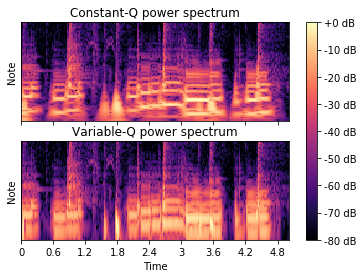

In [6]:
# Generate and plot a variable-Q power spectrum
# 可変Qパワースペクトルを生成してプロットする
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
y, sr = librosa.load(librosa.ex('choice'), duration=5)
C = np.abs(librosa.cqt(y, sr=sr))
V = np.abs(librosa.vqt(y, sr=sr))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                         sr=sr, x_axis='time', y_axis='cqt_note', ax=ax[0])
ax[0].set(title='Constant-Q power spectrum', xlabel=None)
ax[0].label_outer()
img = librosa.display.specshow(librosa.amplitude_to_db(V, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax[1])
ax[1].set_title('Variable-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [7]:
# librosa.iirt
# Time-frequency representation using IIR filters
# This function will return a time-frequency representation using a multirate filter bank consisting of IIR filters. 1
# First, y is resampled as needed according to the provided sample_rates.
# Then, a filterbank with with n band-pass filters is designed.
# The resampled input signals are processed by the filterbank as a whole. 
#  (scipy.signal.filtfilt resp. sosfiltfilt is used to make the phase linear.) The output of the filterbank is cut into frames. 
#   For each band, the short-time mean-square power (STMSP) is calculated by summing win_length subsequent filtered time samples.
# When called with the default set of parameters, it will generate the TF-representation (pitch filterbank):
# 85 filters with MIDI pitches [24, 108] as center_freqs.
# each filter having a bandwith of one semitone.
# IIRフィルターを使用した時間周波数表現
# この関数は、IIRフィルターで構成されるマルチレートフィルターバンクを使用して時間周波数表現を返す
# まず、提供されたsamplea_rateに従って必要に応じて、リサンプリングされる
# 次に、バンドパスフィルターnを備えたフィルターバンクを設計する
# 再サンプリングされた入力信号は、フィルターバンク全体で処理する
# フィルタバンクの出力は、フレームに切断される。各バンドについて、短時間の平均二乗パワーは後続のフィルター処理された時間サンプルを
# 合計することによって、計算される
# デフォルトのパラメータセットを使用して呼び出されると、TF表現が生成される

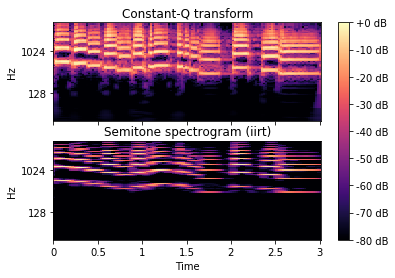

In [8]:
import matplotlib.pyplot as plt
y, sr = librosa.load(librosa.ex('trumpet'), duration=3)
D = np.abs(librosa.iirt(y))
C = np.abs(librosa.cqt(y=y, sr=sr))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max), y_axis='cqt_hz', x_axis='time', ax=ax[0])
ax[0].set(title='Constant-Q transform')
ax[0].label_outer()
img = librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='cqt_hz', x_axis='time', ax=ax[1])
ax[1].set_title('Semitone spectrogram (iirt)')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [1]:
# librosa.fmt
# The fast Mellin transform (FMT)
# The Mellin of a signal y is performed by interpolating y on an exponential time axis, applying a polynomial window, 
# and then taking the discrete Fourier transform.
# When the Mellin parameter (beta) is 1/2, it is also known as the scale transform. 
# The scale transform can be useful for audio analysis 
# because its magnitude is invariant to scaling of the domain (e.g., time stretching or compression). 
# This is analogous to the magnitude of the Fourier transform being invariant to shifts in the input domain.
# 高速メリン変換
# 信号yのメリンは、指数時間軸でyを補間し、多項式ウインドウを適用してから、離散フーリエ変換を行うことによって、実行される
# Mellinパラメーター（ベータ）が1/2の場合、スケール変換とも呼ばれます。1 スケール変換は、その大きさがドメインのスケーリング
#（タイムストレッチや圧縮など）に対して不変であるため、オーディオ分析に役立ちます。
# これは、入力領域のシフトに対して不変であるフーリエ変換の大きさに類似しています。

In [9]:
# Generate a signal and time-stretch it (with energy normalization)
scale = 1.25
freq = 3.0
x1 = np.linspace(0, 1, num=1024, endpoint=False)
x2 = np.linspace(0, 1, num=int(scale * len(x1)), endpoint=False)
y1 = np.sin(2 * np.pi * freq * x1)
y2 = np.sin(2 * np.pi * freq * x2) / np.sqrt(scale)
# Verify that the two signals have the same energy
np.sum(np.abs(y1)**2), np.sum(np.abs(y2)**2)

(512.0, 512.0)

In [10]:
scale1 = librosa.fmt(y1, n_fmt=512)
scale2 = librosa.fmt(y2, n_fmt=512)

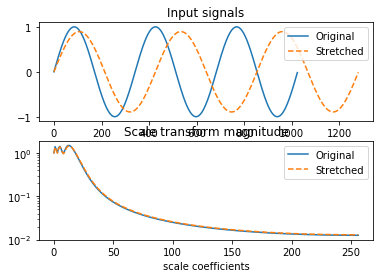

In [11]:
# And plot the results
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2)
ax[0].plot(y1, label='Original')
ax[0].plot(y2, linestyle='--', label='Stretched')
ax[0].set(xlabel='time (samples)', title='Input signals')
ax[0].legend()
ax[1].semilogy(np.abs(scale1), label='Original')
ax[1].semilogy(np.abs(scale2), linestyle='--', label='Stretched')
ax[1].set(xlabel='scale coefficients', title='Scale transform magnitude')
ax[1].legend()

[Text(0.5, 0, 'scale coefficients')]

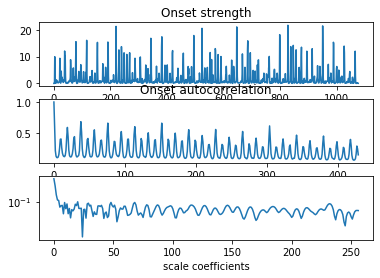

In [12]:
# Plot the scale transform of an onset strength autocorrelation
y, sr = librosa.load(librosa.ex('choice'))
odf = librosa.onset.onset_strength(y=y, sr=sr)
# Auto-correlate with up to 10 seconds lag
odf_ac = librosa.autocorrelate(odf, max_size=10 * sr // 512)
# Normalize
odf_ac = librosa.util.normalize(odf_ac, norm=np.inf)
# Compute the scale transform
odf_ac_scale = librosa.fmt(librosa.util.normalize(odf_ac), n_fmt=512)
# Plot the results
fig, ax = plt.subplots(nrows=3)
ax[0].plot(odf, label='Onset strength')
ax[0].set(xlabel='Time (frames)', title='Onset strength')
ax[1].plot(odf_ac, label='Onset autocorrelation')
ax[1].set(xlabel='Lag (frames)', title='Onset autocorrelation')
ax[2].semilogy(np.abs(odf_ac_scale), label='Scale transform magnitude')
ax[2].set(xlabel='scale coefficients')


In [13]:
# librosa.magphase
# Separate a complex-valued spectrogram D into its magnitude (S) and phase (P) components, so that D = S * P.
# 複素数値のスペクトログラムDを、その大きさ(S)と位相(P)の成分に分離する

In [14]:
y, sr = librosa.load(librosa.ex('trumpet'))
D = librosa.stft(y)
magnitude, phase = librosa.magphase(D)
magnitude

array([[5.3953640e-03, 3.3315693e-03, 1.0328183e-03, ..., 2.2926326e-08,
        9.8623946e-07, 1.2011992e-05],
       [3.2442170e-03, 2.6903967e-03, 1.0622127e-03, ..., 2.4819453e-08,
        9.5359269e-07, 1.2008374e-05],
       [2.3986856e-03, 7.7155454e-04, 1.5704575e-03, ..., 2.5813943e-08,
        9.6956455e-07, 1.1990609e-05],
       ...,
       [7.4183219e-05, 3.6273319e-05, 1.2351239e-06, ..., 3.3514752e-04,
        7.0897001e-04, 8.2297879e-04],
       [7.5229633e-05, 3.7224112e-05, 1.3674936e-06, ..., 2.4655956e-04,
        1.1880830e-04, 1.0312897e-03],
       [7.6400574e-05, 3.9438059e-05, 1.9221090e-06, ..., 1.9005347e-04,
        5.1795773e-04, 1.3460773e-03]], dtype=float32)

In [15]:
phase

array([[ 1.        +0.0000000e+00j,  1.        +0.0000000e+00j,
         1.        +0.0000000e+00j, ..., -1.        -8.7422777e-08j,
        -1.        -8.7422777e-08j, -1.        -8.7422777e-08j],
       [-1.        -8.7422777e-08j, -0.7752065 -6.3170785e-01j,
         0.38602814-9.2248702e-01j, ...,  0.89908874-4.3776646e-01j,
        -0.8854334 -4.6476632e-01j,  0.47213075-8.8152856e-01j],
       [ 1.        +1.5856106e-13j, -0.14261913-9.8977762e-01j,
        -0.95782006+2.8736871e-01j, ..., -0.63766736+7.7031183e-01j,
        -0.53302085-8.4610212e-01j,  0.5546613 +8.3207625e-01j],
       ...,
       [-1.        -8.7422777e-08j,  0.9999964 -2.6659062e-03j,
        -0.25591108-9.6670032e-01j, ..., -0.42010066+9.0747750e-01j,
        -0.41612396-9.0930790e-01j,  0.75288475+6.5815240e-01j],
       [ 1.        -3.2225015e-12j,  0.02785378-9.9961203e-01j,
         0.98902446-1.4775173e-01j, ..., -0.62223953-7.8282690e-01j,
        -0.22175534-9.7510237e-01j, -0.75040364-6.6097987e-01j]

In [16]:
np.angle(phase)

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -3.1415925e+00, -3.1415925e+00, -3.1415925e+00],
       [-3.1415925e+00, -2.4578383e+00, -1.1744742e+00, ...,
        -4.5311293e-01, -2.6582220e+00, -1.0790900e+00],
       [ 1.5856106e-13, -1.7139034e+00,  2.8501141e+00, ...,
         2.2622626e+00, -2.1329632e+00,  9.8284048e-01],
       ...,
       [-3.1415925e+00, -2.6659095e-03, -1.8295864e+00, ...,
         2.0043526e+00, -1.9999748e+00,  7.1836209e-01],
       [-3.2225015e-12, -1.5429389e+00, -1.4829467e-01, ...,
        -2.2423966e+00, -1.7944106e+00, -2.4194689e+00],
       [-3.1415925e+00, -3.1415925e+00, -3.1415925e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [17]:
# Phase recovery

In [18]:
# librosa.griffinlim
# Approximate magnitude spectrogram inversion using the “fast” Griffin-Lim algorithm.
# Given a short-time Fourier transform magnitude matrix (S), the algorithm randomly initializes phase estimates, 
#  and then alternates forward- and inverse-STFT operations. 1
# Note that this assumes reconstruction of a real-valued time-domain signal, 
#  and that S contains only the non-negative frequencies (as computed by stft).
# The “fast” GL method 2 uses a momentum parameter to accelerate convergence.
# 「高速」Griffin-Limアルゴリズムを使用したおおよそのマグニチュードスペクトログラムの反転
# 短時間フーリエ変換の大きさの行列が与えられると、アルゴリズムは位相推定をランダムに初期化し、
#  次に順方向と逆方向のSTFT操作を交互に行う
# これは、実数値の時間領域信号の再構築を想定しており、非負の周波数のみが含まれていることに注意

In [19]:
# 基本的なSTFT逆の例
y, sr = librosa.load(librosa.ex('trumpet'))
# Get the magnitude spectrogram
S = np.abs(librosa.stft(y))
# Invert using Griffin-Lim
y_inv = librosa.griffinlim(S)
# Invert without estimating phase
y_istft = librosa.istft(S)

Text(0.5, 1, 'Magnitude-only istft reconstruction')

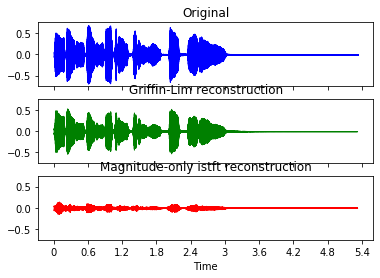

In [21]:
# 結果をウェーブプロットする
import matplotlib.pyplot as plt
import librosa.display
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
librosa.display.waveshow(y, sr=sr, color='b', ax=ax[0])
ax[0].set(title='Original', xlabel=None)
ax[0].label_outer()
librosa.display.waveshow(y_inv, sr=sr, color='g', ax=ax[1])
ax[1].set(title='Griffin-Lim reconstruction', xlabel=None)
ax[1].label_outer()
librosa.display.waveshow(y_istft, sr=sr, color='r', ax=ax[2])
ax[2].set_title('Magnitude-only istft reconstruction')

In [22]:
# librosa.griffinlim_cqt
# Approximate constant-Q magnitude spectrogram inversion using the “fast” Griffin-Lim algorithm.
# Given the magnitude of a constant-Q spectrogram (C), the algorithm randomly initializes phase estimates, 
#  and then alternates forward- and inverse-CQT operations. 1
# This implementation is based on the (fast) Griffin-Lim method for Short-time Fourier Transforms, 
#  but adapted for use with constant-Q spectrograms.
# 「高速」Griffin-Limアルゴリズムを使用したおおよその一定Qの大きさのスペクトログラム反転。
# 定数Qスペクトログラム（C）の大きさが与えられると、アルゴリズムは位相推定をランダムに初期化し、次に順方向と逆方向のCQT操作を交互に行う
# この実装は、短時間フーリエ変換2の（高速）グリフィンリム法に基づいてい ますが、定数Qスペクトログラムでの使用に適合しています。

In [23]:
y, sr = librosa.load(librosa.ex('trumpet', hq=True), sr=None)
# Get the CQT magnitude, 7 octaves at 36 bins per octave
C = np.abs(librosa.cqt(y=y, sr=sr, bins_per_octave=36, n_bins=7*36))
# Invert using Griffin-Lim
y_inv = librosa.griffinlim_cqt(C, sr=sr, bins_per_octave=36)
# And invert without estimating phase
y_icqt = librosa.icqt(C, sr=sr, bins_per_octave=36)

[Text(0.5, 1, 'Magnitude-only icqt reconstruction')]

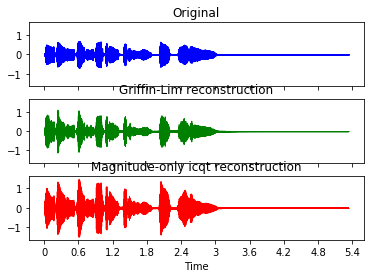

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
librosa.display.waveshow(y, sr=sr, color='b', ax=ax[0])
ax[0].set(title='Original', xlabel=None)
ax[0].label_outer()
librosa.display.waveshow(y_inv, sr=sr, color='g', ax=ax[1])
ax[1].set(title='Griffin-Lim reconstruction', xlabel=None)
ax[1].label_outer()
librosa.display.waveshow(y_icqt, sr=sr, color='r', ax=ax[2])
ax[2].set(title='Magnitude-only icqt reconstruction')

In [25]:
# Harmonics
# librosa.interp_harmonics
# Compute the energy at harmonics of time-frequency representation.
# Given a frequency-based energy representation such as a spectrogram or tempogram, 
# this function computes the energy at the chosen harmonics of the frequency axis. (See examples below.) 
# The resulting harmonic array can then be used as input to a salience computation.
# 時間周波数表現の高調波でのエネルギーを計算する
# スペクトログラムやテンポグラムなどの周波数ベースのエネルギー表現が与えられると、この関数は周波数軸の選択された高調波でエネルギーを計算する
# 結果の高調波配列は、顕著性計算への入力として使用できる

In [26]:
# Estimate the harmonics of a time-averaged tempogram
# 時間平均されたテンポグラムの高調波を推定する
y, sr = librosa.load(librosa.ex('choice'))
# Compute the time-varying tempogram and average over time
tempi = np.mean(librosa.feature.tempogram(y=y, sr=sr), axis=1)
# We'll measure the first five harmonics
h_range = [1, 2, 3, 4, 5]
f_tempo = librosa.tempo_frequencies(len(tempi), sr=sr)
# Build the harmonic tensor
t_harmonics = librosa.interp_harmonics(tempi, f_tempo, h_range)
print(t_harmonics.shape)

(5, 384)


[[<matplotlib.axis.YTick at 0x13b03ac8>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5')],
 Text(0, 0.5, 'Harmonic'),
 Text(0.5, 0, 'Tempo (BPM)')]

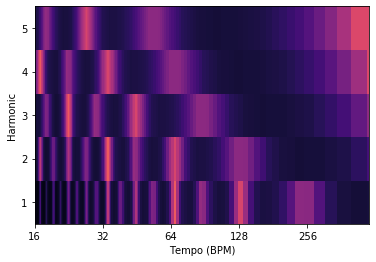

In [27]:
# And plot the results
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
librosa.display.specshow(t_harmonics, x_axis='tempo', sr=sr, ax=ax)
ax.set(yticks=0.5 + np.arange(len(h_range)),
       yticklabels=['{:.3g}'.format(_) for _ in h_range],
       ylabel='Harmonic', xlabel='Tempo (BPM)')

In [28]:
# We can also compute frequency harmonics for spectrograms. To calculate sub-harmonic energy, use values < 1.
# スペクトログラムの周波数高調波を計算することもできます。分数調波エネルギーを計算するには、1未満の値を使用します。
y, sr = librosa.load(librosa.ex('trumpet'), duration=3)
h_range = [1./3, 1./2, 1, 2, 3, 4]
S = np.abs(librosa.stft(y))
fft_freqs = librosa.fft_frequencies(sr=sr)
S_harm = librosa.interp_harmonics(S, fft_freqs, h_range, axis=0)
print(S_harm.shape)

(6, 1025, 130)


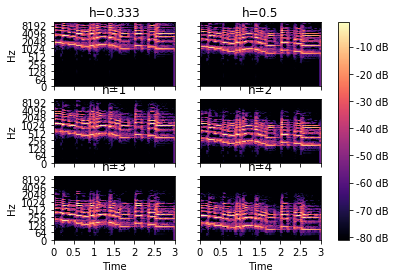

In [29]:
ig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True)
for i, _sh in enumerate(S_harm):
    img = librosa.display.specshow(librosa.amplitude_to_db(_sh,
                                                     ref=S.max()),
                             sr=sr, y_axis='log', x_axis='time',
                             ax=ax.flat[i])
    ax.flat[i].set(title='h={:.3g}'.format(h_range[i]))
    ax.flat[i].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [30]:
# librosa.salience
# Harmonic salience function.
# 調和的な顕著性機能


In [31]:
y, sr = librosa.load(librosa.ex('trumpet'), duration=3)
S = np.abs(librosa.stft(y))
freqs = librosa.fft_frequencies(sr)
harms = [1, 2, 3, 4]
weights = [1.0, 0.5, 0.33, 0.25]
S_sal = librosa.salience(S, freqs, harms, weights, fill_value=0)
print(S_sal.shape)

(1025, 130)


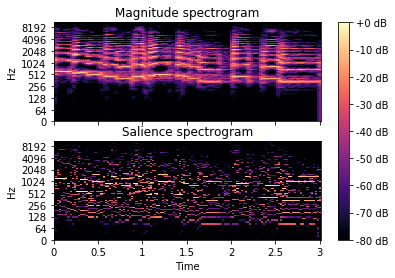

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         sr=sr, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Magnitude spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(librosa.amplitude_to_db(S_sal,
                                                       ref=np.max),
                               sr=sr, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Salience spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [33]:
# librosa.phase_vocoder
# Phase vocoder. Given an STFT matrix D, speed up by a factor of rate
# Based on the implementation provided by 1.
# This is a simplified implementation, intended primarily for reference and pedagogical purposes. 
# It makes no attempt to handle transients, and is likely to produce many audible artifacts. 
# For a higher quality implementation, we recommend the RubberBand library 2 and its Python wrapper pyrubberband.

In [34]:
# Play at double speed
y, sr   = librosa.load(librosa.ex('trumpet'))
D       = librosa.stft(y, n_fft=2048, hop_length=512)
D_fast  = librosa.phase_vocoder(D, 2.0, hop_length=512)
y_fast  = librosa.istft(D_fast, hop_length=512)

In [35]:
# Or play at 1/3 speed
y, sr   = librosa.load(librosa.ex('trumpet'))
D       = librosa.stft(y, n_fft=2048, hop_length=512)
D_slow  = librosa.phase_vocoder(D, 1./3, hop_length=512)
y_slow  = librosa.istft(D_slow, hop_length=512)
